In [62]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, input_dim, middle_dim, output_dim):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, output_dim),
        )
    
    def forward(self, x):
        out = self.model(x)
        return out

# Create our model
model = Model(1, 512, 1)

# Define loss function and optimizer
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [63]:
X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(X).ravel() + np.cos(X).ravel()
y = np.sin(X).ravel() + np.cos(X).ravel() + np.sin(2*X).ravel() + np.cos(2*X).ravel() + np.sin(3*X).ravel() + np.cos(3*X).ravel() + np.sin(4*X).ravel() + np.cos(4*X).ravel() + np.sin(5*X).ravel() + np.cos(5*X).ravel()

# These are dataloaders which are responsible for splitting the test and train data into batches
# that can be fed into the model for training
X_train, X_test, y_train, y_test = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_test.unsqueeze(1), y_test.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)

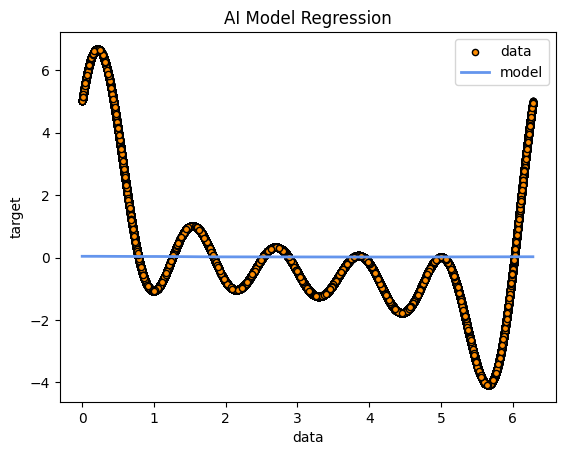

In [64]:
lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()

In [65]:
loss_values = []
epochs = 10

for epoch in range(epochs):
    for train, expected in train_dataloader:
        train = train.type(torch.float32)
        expected = expected.type(torch.float32)

        optimizer.zero_grad()

        # Feed the data into our model
        y_pred = model(train)

        # Calculate the loss (how far off the model is from the expected result)
        # then backpropagate the error to adjust the model's weights
        loss = criterion(y_pred, expected)
        loss_values.append(loss)
        loss.backward()
        optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

step = np.linspace(0, 100, epochs)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

epoch 0, loss 1.4975097179412842
epoch 1, loss 1.5774083137512207
epoch 2, loss 2.131484270095825
epoch 3, loss 1.1656889915466309
epoch 4, loss 1.4095070362091064
epoch 5, loss 1.192155122756958
epoch 6, loss 0.9977299571037292
epoch 7, loss 1.1091033220291138
epoch 8, loss 1.4334964752197266
epoch 9, loss 0.9117192029953003


NameError: name 'num_epochs' is not defined

epoch 0, loss 1.814361333847046
epoch 1, loss 2.24139404296875
epoch 2, loss 1.8980451822280884
epoch 3, loss 1.2210155725479126
epoch 4, loss 1.5542153120040894
epoch 5, loss 1.2732126712799072
epoch 6, loss 1.5482920408248901
epoch 7, loss 1.2586883306503296
epoch 8, loss 1.6719197034835815
epoch 9, loss 1.9138911962509155
epoch 10, loss 1.7599154710769653
epoch 11, loss 1.3056187629699707
epoch 12, loss 1.2749788761138916
epoch 13, loss 0.6483240723609924
epoch 14, loss 0.9427196979522705
epoch 15, loss 1.4178611040115356
epoch 16, loss 1.0650436878204346
epoch 17, loss 2.2960498332977295
epoch 18, loss 2.258131504058838
epoch 19, loss 0.3015124499797821
epoch 20, loss 0.9106051921844482
epoch 21, loss 1.1866493225097656
epoch 22, loss 0.8244656324386597
epoch 23, loss 1.3137998580932617
epoch 24, loss 0.661117434501648
epoch 25, loss 0.6175556182861328
epoch 26, loss 1.509709358215332
epoch 27, loss 1.0958257913589478
epoch 28, loss 1.5658702850341797
epoch 29, loss 0.6129398345947

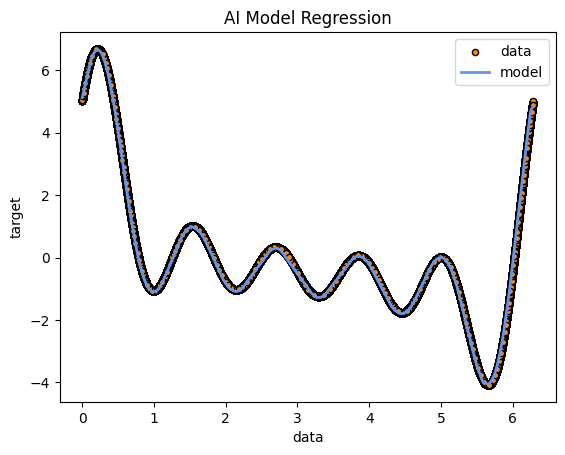

In [61]:
lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()